<a href="https://colab.research.google.com/github/zkkxuu/Airbnb-Consumer-Decision-Predicting/blob/master/Copy_of_Tweet_Emotion_Recognition_Learner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [2]:
!pip install nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.1 MB/s 
     |████████████████████████████████| 212 kB 47.3 MB/s 


In [3]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

    
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.8.2


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [4]:
dataset = nlp.load_dataset('emotion')

Downloading:   0%|          | 0.00/3.41k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/6.01k [00:00<?, ?B/s]

Using custom data configuration default


Downloading:   0%|          | 0.00/1.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/204k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/207k [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/84e07cd366f4451464584cdbd4958f512bcaddb1e921341e07298ce8a9ce42f4. Subsequent calls will reuse this data.


In [5]:
train = dataset['train']
test = dataset['test']
val = dataset['validation']

In [6]:
dataset

{'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [7]:
def get_tweet(data):
  tweets = [x['text'] for x in data]
  labels = [x['label'] for x in data]
  return tweets, labels




In [8]:
tweets, labels = get_tweet(train)

## Task 4: Tokenizer

1. Tokenizing the tweets

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
tk = Tokenizer(num_words = 10000, oov_token = '<UNK>')
tk.fit_on_texts(tweets)

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

(array([  8.,  45., 310., 488., 539., 625., 626., 629., 613., 636., 654.,
        655., 608., 622., 609., 603., 559., 535., 530., 510., 452., 430.,
        382., 385., 330., 327., 336., 317., 238., 208., 200., 200., 167.,
        157., 141., 144., 120., 117., 117.,  88.,  96.,  72.,  66.,  66.,
         65.,  52.,  37.,  43.,  30.,  32.,  31.,  26.,  30.,  20.,  23.,
         14.,   9.,  10.,   4.,   4.,   4.,   1.,   4.,   1.]),
 array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40.,
        41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53.,
        54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66.]),
 <a list of 64 Patch objects>)

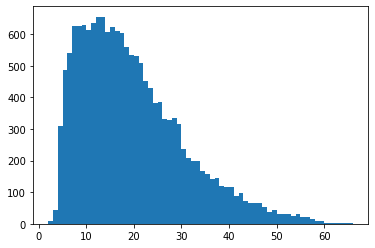

In [10]:
lens = [len(t.split(' ')) for t in tweets]
plt.hist(lens, bins = len(set(lens)))

In [66]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
def get_sequence(tokenizer, tweet):
  sequences = tokenizer.texts_to_sequences(tweet)
  rt = pad_sequences(sequences, truncating = 'post', padding = 'post', maxlen = 50)
  return rt

In [67]:
get_sequence(tk, tweets)

array([[   2,  139,    3, ...,    0,    0,    0],
       [   2,   40,  101, ...,    0,    0,    0],
       [  17, 3060,    7, ...,    0,    0,    0],
       ...,
       [   2,    3,  327, ...,    0,    0,    0],
       [   2,    3,   14, ...,    0,    0,    0],
       [   2,   47,    7, ...,    0,    0,    0]], dtype=int32)

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [26]:
classes = set(labels)
cls2idx = dict((j, i) for i,j in enumerate(classes))
idx2cls = dict((j, i) for i,j in cls2idx.items())
emo2id = lambda labels: np.array([cls2idx.get(x) for x in labels])

In [27]:
train_labels = emo2id(labels)

(array([4666.,    0.,    0.,    0., 2159.,    0.,    0.,    0., 1304.,
           0.,    0.,    0.,  572.,    0.,    0.,    0., 1937.,    0.,
           0.,    0., 5362.]),
 array([0.        , 0.23809524, 0.47619048, 0.71428571, 0.95238095,
        1.19047619, 1.42857143, 1.66666667, 1.9047619 , 2.14285714,
        2.38095238, 2.61904762, 2.85714286, 3.0952381 , 3.33333333,
        3.57142857, 3.80952381, 4.04761905, 4.28571429, 4.52380952,
        4.76190476, 5.        ]),
 <a list of 21 Patch objects>)

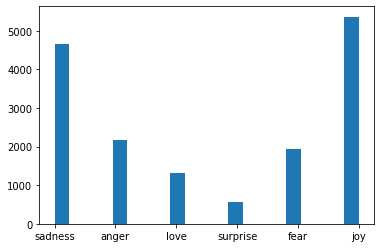

In [44]:
plt.hist(labels, bins = 21)

In [25]:
cls2idx

{0: 'anger', 1: 'joy', 2: 'sadness', 3: 'love', 4: 'fear', 5: 'surprise'}

## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [46]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(10000, 16, input_length = 50),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences= True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
  tf.keras.layers.Dense(6, activation = 'softmax')
])

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            160000    
                                                                 
 bidirectional (Bidirectiona  (None, 50, 40)           5920      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [69]:
val_tweets, val_labels = get_tweet(val)
val_labels = emo2id(val_labels)
val_tweets = get_sequence(tk, val_tweets)
train_tweets = get_sequence(tk, tweets)

In [70]:
h = model.fit(
    train_tweets, train_labels,
    validation_data = (val_tweets, val_labels),
    epochs = 20,
    callbacks = [
                 tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 2)
    ]
)

Epoch 1/20
500/500 [==============================] - 31s 52ms/step - loss: 1.2674 - accuracy: 0.5046 - val_loss: 0.7325 - val_accuracy: 0.7165
Epoch 2/20
500/500 [==============================] - 24s 48ms/step - loss: 0.5414 - accuracy: 0.7989 - val_loss: 0.5592 - val_accuracy: 0.8030
Epoch 3/20
500/500 [==============================] - 24s 48ms/step - loss: 0.3188 - accuracy: 0.8973 - val_loss: 0.4681 - val_accuracy: 0.8505
Epoch 4/20
500/500 [==============================] - 24s 48ms/step - loss: 0.2245 - accuracy: 0.9315 - val_loss: 0.4403 - val_accuracy: 0.8620
Epoch 5/20
500/500 [==============================] - 24s 49ms/step - loss: 0.1768 - accuracy: 0.9459 - val_loss: 0.3894 - val_accuracy: 0.8710
Epoch 6/20
500/500 [==============================] - 25s 49ms/step - loss: 0.1461 - accuracy: 0.9547 - val_loss: 0.4185 - val_accuracy: 0.8730
Epoch 7/20
500/500 [==============================] - 26s 51ms/step - loss: 0.1209 - accuracy: 0.9625 - val_loss: 0.4273 - val_accuracy:

In [64]:
val_tweets.shape

(2000, 1, 50)

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

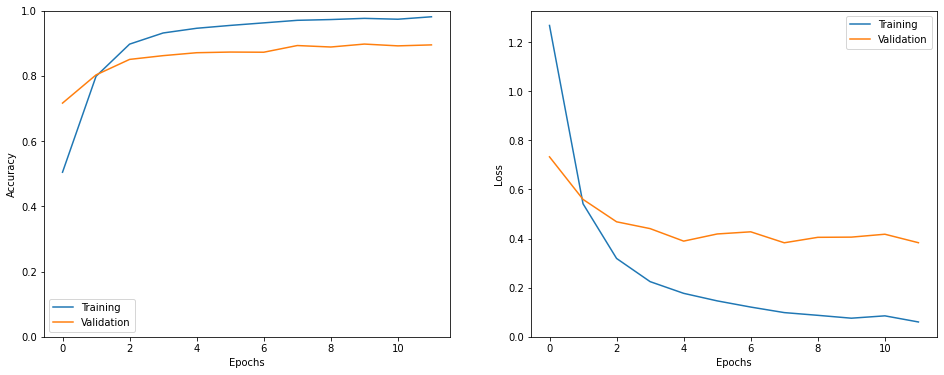

In [71]:
show_history(h)

In [85]:
test_tweets, test_labels = get_tweet(test)
test_seq = get_sequence(tk, test_tweets)
test_num_lab = emo2id(test_labels)

_ = model.evaluate(test_seq, test_num_lab)

63/63 [==============================] - 1s 15ms/step - loss: 0.4285 - accuracy: 0.8790


In [91]:
for k in range(0,10):
  i = random.randint(0, len(test_labels) - 1)
  print('Sentence: ', test_tweets[i])
  print('Emotion: ', test_labels[i])

  pred = model.predict(np.expand_dims(test_seq[i], axis = 0))[0]
  pred_class = idx2cls[np.argmax(pred).astype('uint8')]

  print('Predicted Emotion: ', pred_class)
  print('---------------------------')

Sentence:  i feel a little nervous i go to the gym
Emotion:  fear
Predicted Emotion:  fear
---------------------------
Sentence:  i feel not having a generous spirit or a forgiving nature closes me off from accepting gifts from the universe
Emotion:  love
Predicted Emotion:  love
---------------------------
Sentence:  i really feel like i am useless in this world
Emotion:  sadness
Predicted Emotion:  sadness
---------------------------
Sentence:  i check you when you re sleeping feel your nose and toes to be sure you aren t too hot or cold
Emotion:  joy
Predicted Emotion:  love
---------------------------
Sentence:  i just feel extremely comfortable with the group of people that i dont even need to hide myself
Emotion:  joy
Predicted Emotion:  joy
---------------------------
Sentence:  i suppose if one was feeling generous one could say i was stressed by the elevator ride
Emotion:  joy
Predicted Emotion:  joy
---------------------------
Sentence:  im not feeling pressured to perform at